**Set environment**

In [1]:
suppressMessages(suppressWarnings(source("../run_config_project.R")))
show_env()

BASE DIRECTORY (FD_BASE): /hpc/group/igvf/kk319 
REPO DIRECTORY (FD_REPO): /hpc/group/igvf/kk319/repo 
WORK DIRECTORY (FD_WORK): /hpc/group/igvf/kk319/work 
DATA DIRECTORY (FD_DATA): /hpc/group/igvf/kk319/data 

You are working with      IGVF BlueSTARR 
PATH OF PROJECT (FD_PRJ): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR 
PROJECT RESULTS (FD_RES): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/results 
PROJECT SCRIPTS (FD_EXE): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/scripts 
PROJECT DATA    (FD_DAT): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/data 
PROJECT NOTE    (FD_NBK): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/notebooks 
PROJECT DOCS    (FD_DOC): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/docs 
PROJECT LOG     (FD_LOG): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/log 
PROJECT REF     (FD_REF): /hpc/group/igvf/kk319/repo/Proj_IGVF_BlueSTARR/references 



## Import data

**Check file existence**

In [3]:
### set file directory
txt_fdiry = file.path(FD_DAT, "variant_bluestarr_richard", "closed")
vec = dir(txt_fdiry)
for (txt in vec){cat(txt, "\n")}

annotated_snv_sites_filtered.tsv.gz 
annotated_snv_sites.tsv.gz 
regions_GoF_only.fasta.gz 
regions.fasta.gz 


**Import table**

In [5]:
### set file directory
txt_fdiry = file.path(FD_DAT, "variant_bluestarr_richard", "closed")
txt_fname = "annotated_snv_sites.tsv.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_variant_unfilter = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1885038       6


region,pos0,delta,ref,obs,unobs
chr4:74487576-74488141,74487586,0.9649841,A,G,C
chr9:135685425-135685942,135685432,0.9454227,G,G,C
chr1:173251481-173251541,173251490,0.9101272,G,G,C


In [4]:
### set file directory
txt_fdiry = file.path(FD_DAT, "variant_bluestarr_richard", "closed")
txt_fname = "annotated_snv_sites_filtered.tsv.gz"
txt_fpath = file.path(txt_fdiry, txt_fname)

### read table
dat = read_tsv(txt_fpath, show_col_types = FALSE)

### assign and show
dat_region_variant_filter = dat
print(dim(dat))
fun_display_table(head(dat, 3))

[1] 1884977       6


region,pos0,delta,ref,obs,unobs
chr4:74487576-74488141,74487586,0.9649841,A,G,C
chr9:135685425-135685942,135685432,0.9454227,G,G,C
chr1:173251481-173251541,173251490,0.9101272,G,G,C


**Check table**

In [6]:
dat = dat_region_variant_unfilter
cat("Missing?", any(is.na(dat)))

[1] FALSE

In [8]:
dat = dat_region_variant_filter
cat("Missing?", any(is.na(dat)))

Missing? FALSE

In [11]:
1885038 - 1884977

[1] 61

## Explore: Distribution of delta

In [9]:
dat = dat_region_variant_unfilter
summary(dat$delta)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.002268 0.005376 0.008106 0.010677 0.964984 

In [10]:
dat = dat_region_variant_filter
summary(dat$delta)

    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.002268 0.005376 0.008106 0.010677 0.964984 

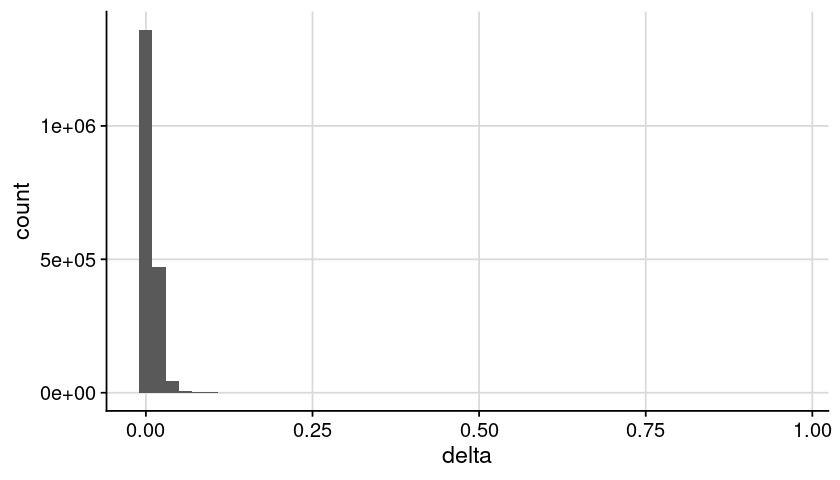

In [13]:
dat = dat_region_variant_filter
gpt = ggplot(dat, aes(x=delta)) +
    geom_histogram(bins = 50) +
    theme_cowplot() +
    background_grid()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

Warning message:
“Removed 11073 rows containing non-finite outside the scale range (`stat_bin()`).”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range (`geom_bar()`).”


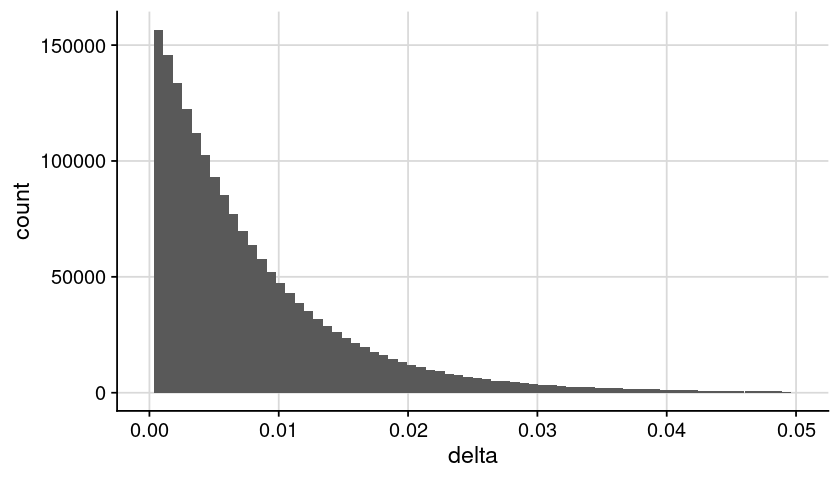

In [17]:
dat = dat_region_variant_filter
gpt = ggplot(dat, aes(x=delta)) +
    geom_histogram(bins = 70) +
    theme_cowplot() +
    background_grid() +
    xlim(0, 0.05)

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)

Warning message in scale_x_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 6 rows containing non-finite outside the scale range (`stat_bin()`).”


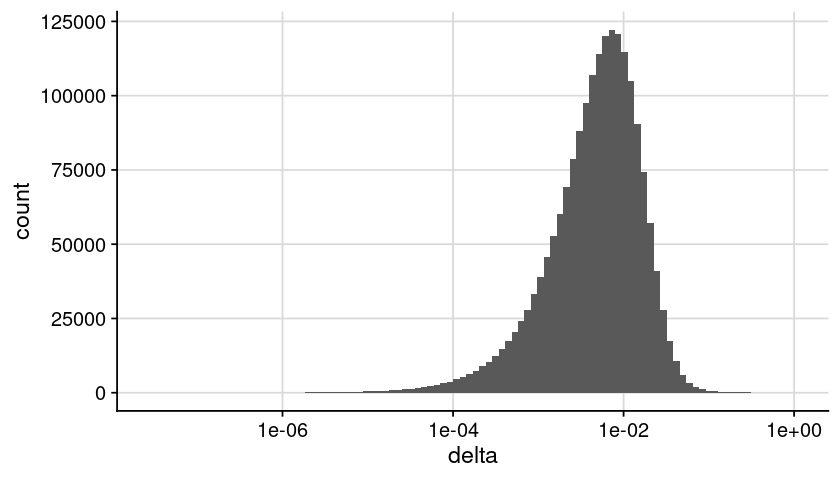

In [18]:
dat = dat_region_variant_filter
gpt = ggplot(dat, aes(x=delta)) +
    geom_histogram(bins = 100) +
    theme_cowplot() +
    background_grid() +
    scale_x_log10()

options(repr.plot.height=4, repr.plot.width=7)
print(gpt)